In [ ]:

import pandas as pd

# Load all sheets
demo = pd.read_excel("Customer_Churn_Data_Large (1).xlsx", sheet_name="Customer_Demographics")
trans = pd.read_excel("Customer_Churn_Data_Large (1).xlsx", sheet_name="Transaction_History")
service = pd.read_excel("Customer_Churn_Data_Large (1).xlsx", sheet_name="Customer_Service")
online = pd.read_excel("Customer_Churn_Data_Large (1).xlsx", sheet_name="Online_Activity")
churn = pd.read_excel("Customer_Churn_Data_Large (1).xlsx", sheet_name="Churn_Status")

# --- Handle Transaction Summary ---
# Check which relevant columns are available
print("Transaction columns:", trans.columns.tolist())

# Build a summary dynamically
agg_dict = {}
if 'AmountSpent' in trans.columns:
    agg_dict['AmountSpent'] = ['sum', 'mean']
if 'TransactionID' in trans.columns:
    agg_dict['TransactionID'] = 'count'

# Only create summary if we have numeric data to aggregate
if agg_dict:
    trans_summary = trans.groupby('CustomerID').agg(agg_dict).reset_index()
    # Rename columns clearly
    trans_summary.columns = ['CustomerID'] + [
        'TotalSpent' if 'sum' in c else
        'AvgSpent' if 'mean' in c else
        'TransactionCount' for c in trans_summary.columns[1:]
    ]
else:
    # If no numeric data to aggregate, just keep CustomerID
    trans_summary = trans[['CustomerID']].drop_duplicates()

# --- Merge all sheets ---
merged_df = demo.merge(trans_summary, on='CustomerID', how='left')
merged_df = merged_df.merge(service, on='CustomerID', how='left')
merged_df = merged_df.merge(online, on='CustomerID', how='left')
merged_df = merged_df.merge(churn, on='CustomerID', how='left')

# --- Preview merged data ---
print("Merged dataset shape:", merged_df.shape)
print(merged_df.head())
print(merged_df.shape)


Transaction columns: ['CustomerID', 'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory']
Merged dataset shape: (1334, 16)
   CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent  AvgSpent  \
0           1   62      M        Single         Low      416.50   416.500   
1           2   65      M       Married         Low     1547.42   221.060   
2           3   18      M        Single         Low     1702.98   283.830   
3           4   21      M       Widowed         Low      917.29   183.458   
4           4   21      M       Widowed         Low      917.29   183.458   

   TransactionCount  InteractionID InteractionDate InteractionType  \
0                 1         6363.0      2022-03-31         Inquiry   
1                 7         3329.0      2022-03-17         Inquiry   
2                 6         9976.0      2022-08-24         Inquiry   
3                 5         7354.0      2022-11-18         Inquiry   
4                 5         5393.0      2022-07-

In [ ]:
merged_df.describe()
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1334 non-null   int64         
 1   Age               1334 non-null   int64         
 2   Gender            1334 non-null   object        
 3   MaritalStatus     1334 non-null   object        
 4   IncomeLevel       1334 non-null   object        
 5   TotalSpent        1334 non-null   float64       
 6   AvgSpent          1334 non-null   float64       
 7   TransactionCount  1334 non-null   int64         
 8   InteractionID     1002 non-null   float64       
 9   InteractionDate   1002 non-null   datetime64[ns]
 10  InteractionType   1002 non-null   object        
 11  ResolutionStatus  1002 non-null   object        
 12  LastLoginDate     1334 non-null   datetime64[ns]
 13  LoginFrequency    1334 non-null   int64         
 14  ServiceUsage      1334 n

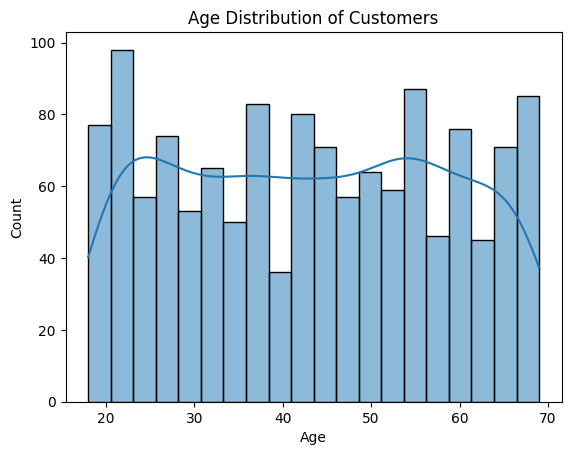

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(merged_df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.show()


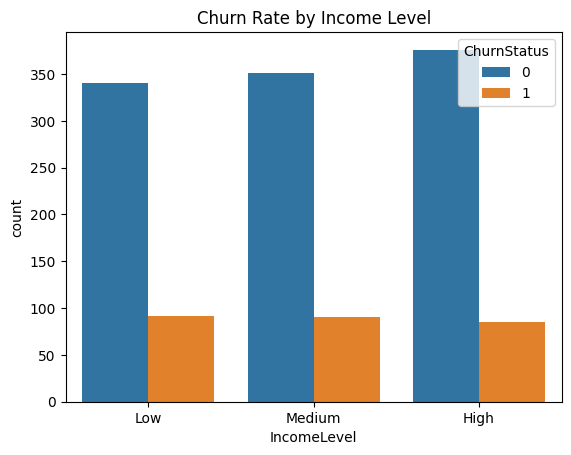

In [ ]:
sns.countplot(x='IncomeLevel', hue='ChurnStatus', data=merged_df)
plt.title("Churn Rate by Income Level")
plt.show()


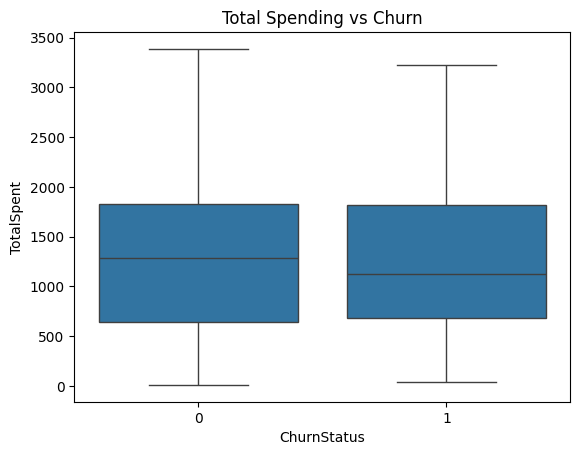

In [ ]:
sns.boxplot(x='ChurnStatus', y='TotalSpent', data=merged_df)
plt.title("Total Spending vs Churn")
plt.show()


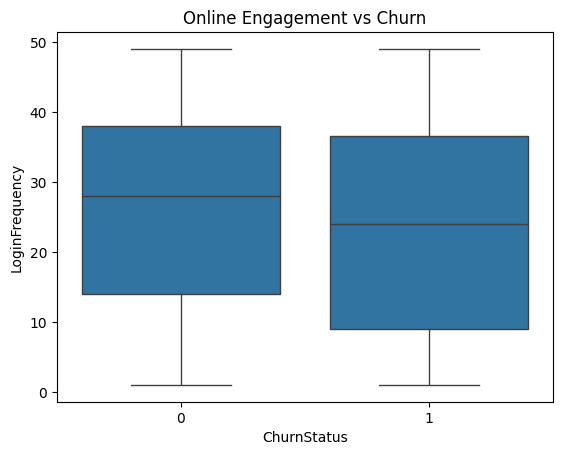

In [ ]:
sns.boxplot(x='ChurnStatus', y='LoginFrequency', data=merged_df)
plt.title("Online Engagement vs Churn")
plt.show()


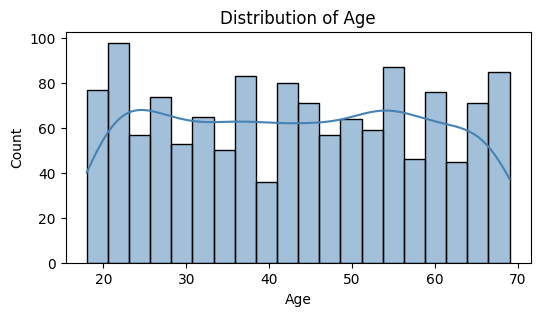

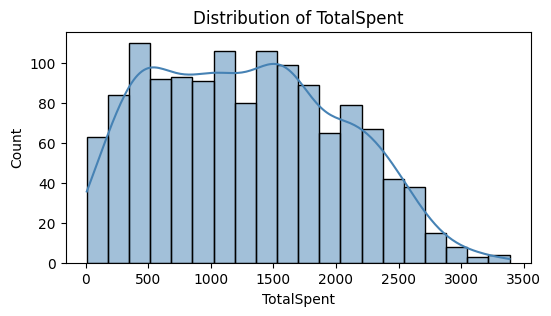

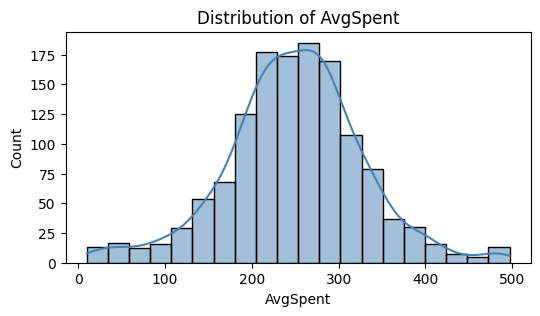

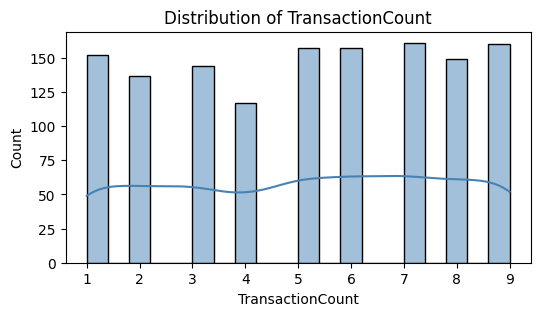

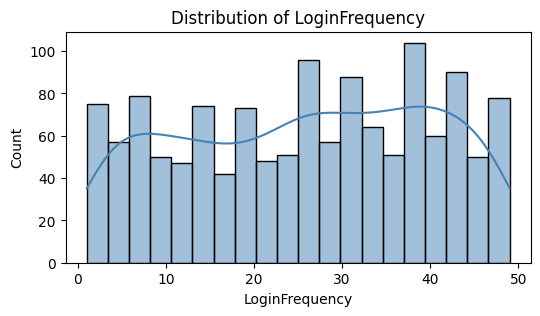

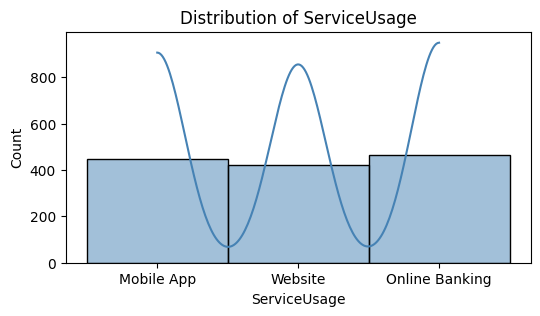

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'TotalSpent', 'AvgSpent', 'TransactionCount', 'LoginFrequency', 'ServiceUsage']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(merged_df[col], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.show()


/tmp/ipython-input-2095917749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_df, palette='viridis')


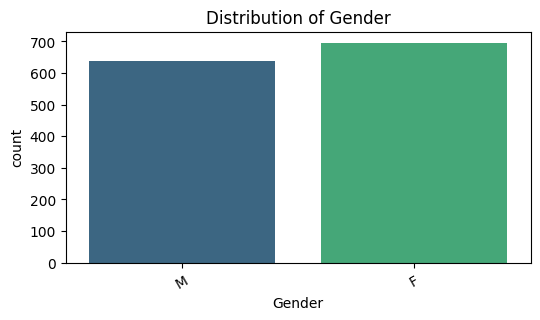

/tmp/ipython-input-2095917749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_df, palette='viridis')


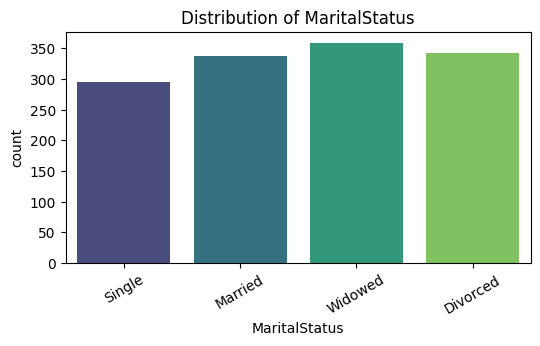

/tmp/ipython-input-2095917749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged_df, palette='viridis')


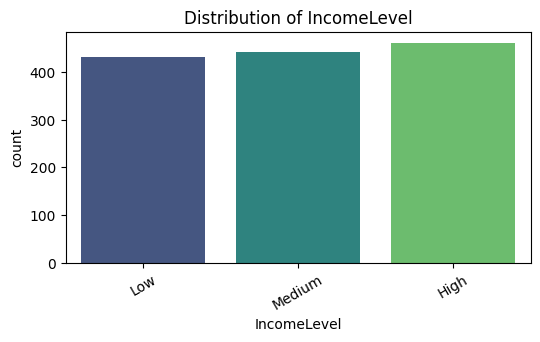

In [ ]:
cat_cols = ['Gender', 'MaritalStatus', 'IncomeLevel']

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=merged_df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.show()


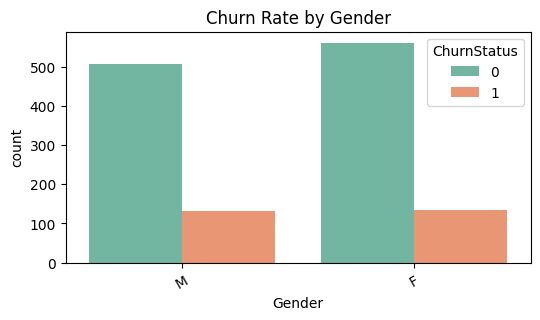

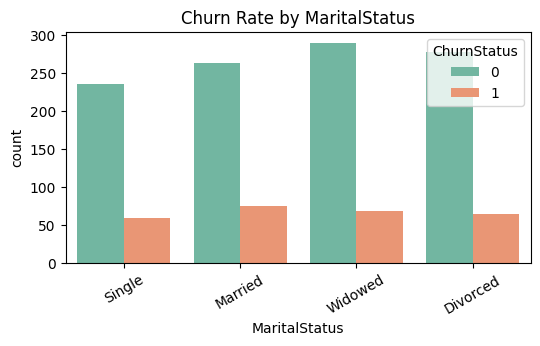

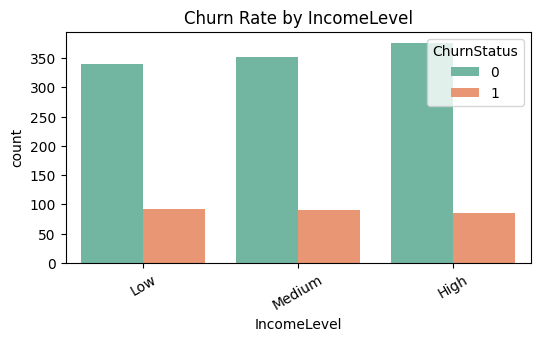

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='ChurnStatus', data=merged_df, palette='Set2')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=30)
    plt.show()


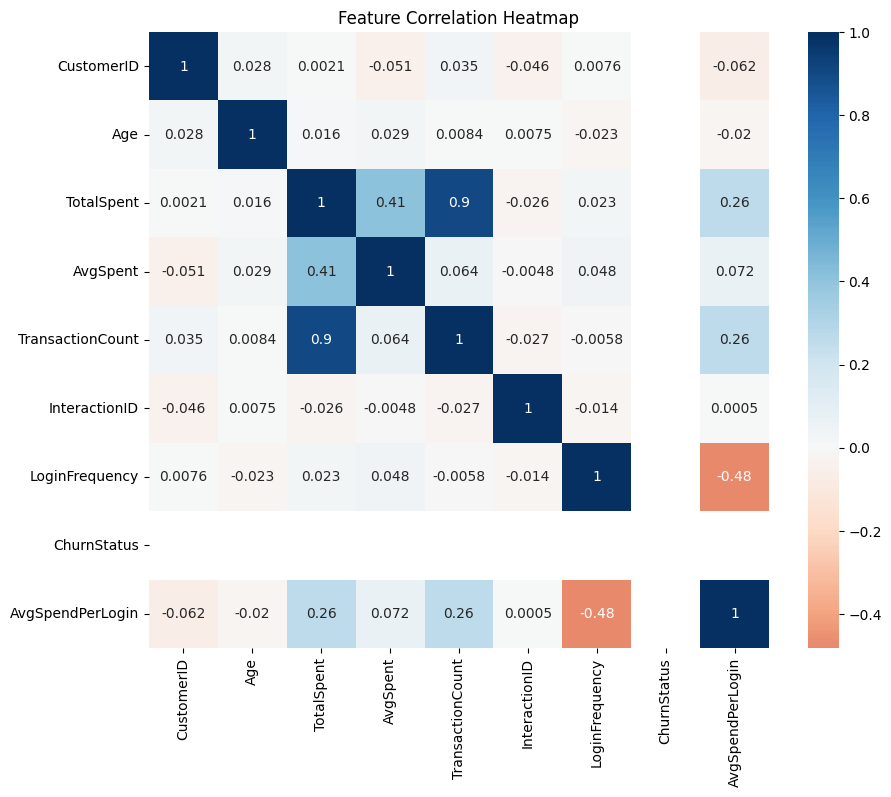

In [ ]:
merged_df['ChurnStatus'] = merged_df['ChurnStatus'].map({'Yes': 1, 'No': 0})
num_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
corr = merged_df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='RdBu', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import numpy as np

merged_df['AvgSpendPerLogin'] = np.where(
    merged_df['LoginFrequency']>0,
    merged_df['TotalSpent']/merged_df['LoginFrequency'],
    0
)


In [ ]:
for col in ['TotalSpent', 'AvgSpent', 'LoginFrequency']:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    merged_df[col] = merged_df[col].clip(lower, upper)


In [ ]:
merged_df.to_csv("Cleaned_Customer_Churn_Data.csv", index=False)


   CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent  AvgSpent  \
0           1   62      M        Single         Low      416.50   416.500   
1           2   65      M       Married         Low     1547.42   221.060   
2           3   18      M        Single         Low     1702.98   283.830   
3           4   21      M       Widowed         Low      917.29   183.458   
4           4   21      M       Widowed         Low      917.29   183.458   

   TransactionCount  InteractionID InteractionDate InteractionType  \
0                 1         6363.0      2022-03-31         Inquiry   
1                 7         3329.0      2022-03-17         Inquiry   
2                 6         9976.0      2022-08-24         Inquiry   
3                 5         7354.0      2022-11-18         Inquiry   
4                 5         5393.0      2022-07-03         Inquiry   

  ResolutionStatus LastLoginDate  LoginFrequency ServiceUsage  ChurnStatus  \
0         Resolved    2023-10-21      

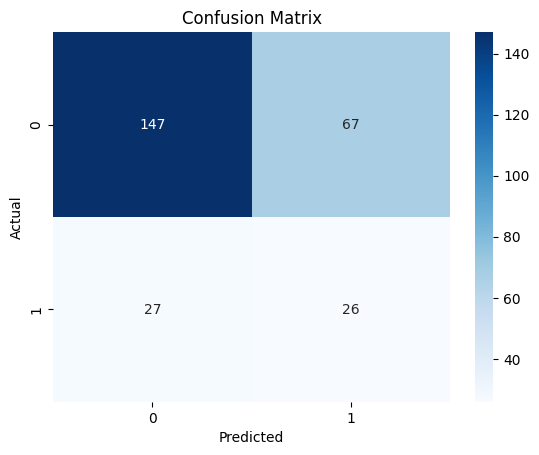

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       214
           1       0.28      0.49      0.36        53

    accuracy                           0.65       267
   macro avg       0.56      0.59      0.56       267
weighted avg       0.73      0.65      0.68       267

ROC-AUC Score: 0.609945335919591


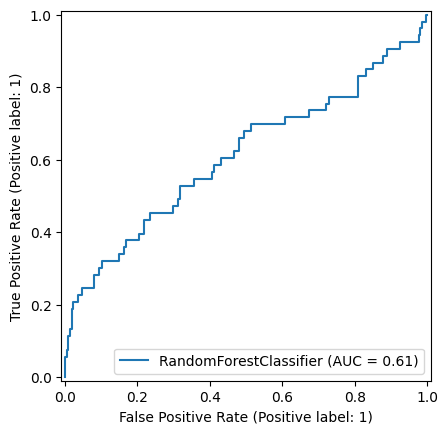

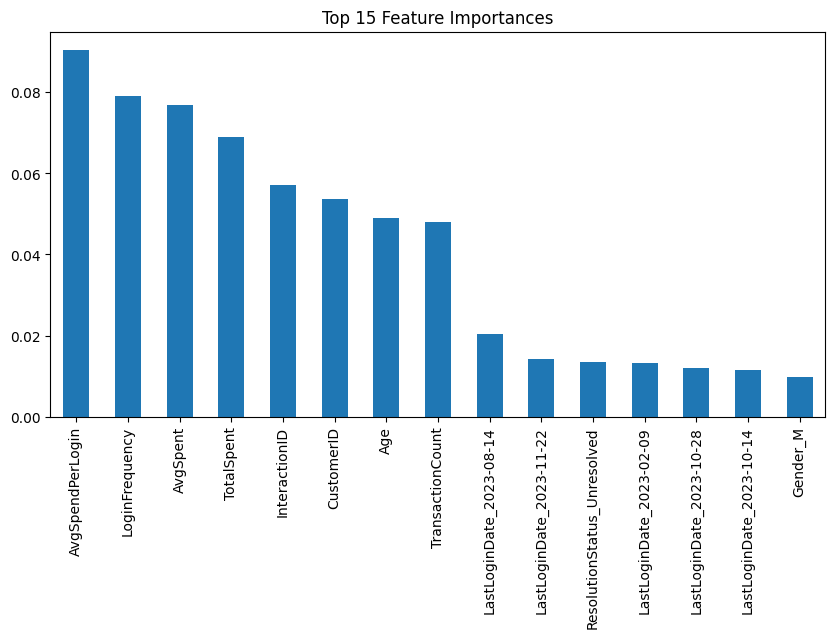

     ChurnProbability  ActualChurn
299          0.564971            1
455          0.544772            1
538          0.540420            1
2            0.540191            0
687          0.539710            1
238          0.536093            0
777          0.535374            1
91           0.533645            1
808          0.532548            0
550          0.530813            1


In [ ]:
# ===========================
# Customer Churn Prediction
# ===========================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# ---------------------------
#  Load Data
# ---------------------------
# Replace 'customer_churn.csv' with your file path
df = pd.read_csv('Cleaned_Customer_Churn_Data.csv')

# Quick look at the data
print(df.head())
print(df.info())
print(df['ChurnStatus'].value_counts())

# ---------------------------
# Preprocessing
# ---------------------------
# Encode target variable
le = LabelEncoder()
df['ChurnStatus'] = le.fit_transform(df['ChurnStatus'])  # Yes=1, No=0

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'ChurnStatus']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

# Optional: Scale numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
#  Model Training & Hyperparameter Tuning
# ---------------------------
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# ---------------------------
#  Model Evaluation
# ---------------------------
# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

# ---------------------------
# Feature Importance
# ---------------------------
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Feature Importances")
plt.show()

# ---------------------------
# Predicting Churn Probabilities
# ---------------------------
# Assign churn probability to customers
X_test['ChurnProbability'] = y_proba
X_test['ActualChurn'] = y_test.values

# View top 10 customers with highest churn risk
top_risk = X_test.sort_values('ChurnProbability', ascending=False).head(10)
print(top_risk[['ChurnProbability', 'ActualChurn']])


Before SMOTE: ChurnStatus
0    853
1    214
Name: count, dtype: int64
After SMOTE: ChurnStatus
0    853
1    853
Name: count, dtype: int64
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


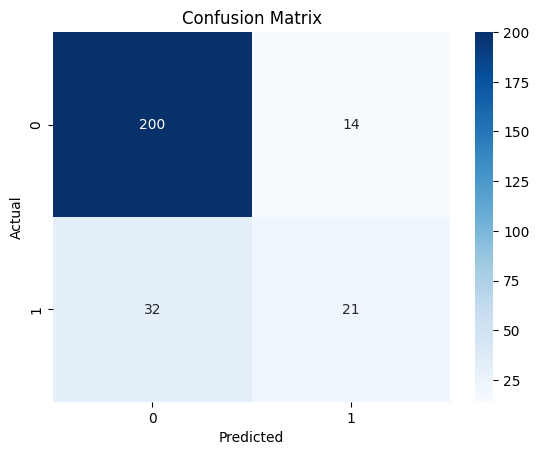

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       214
           1       0.60      0.40      0.48        53

    accuracy                           0.83       267
   macro avg       0.73      0.67      0.69       267
weighted avg       0.81      0.83      0.81       267

ROC-AUC Score: 0.7558631634632341


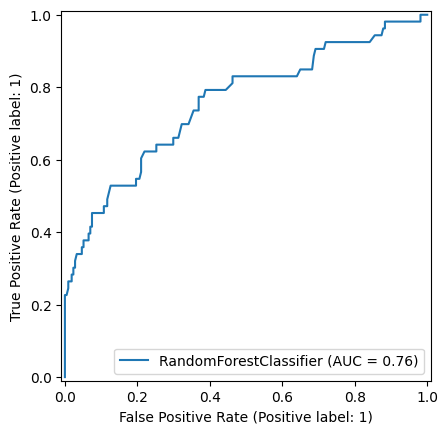

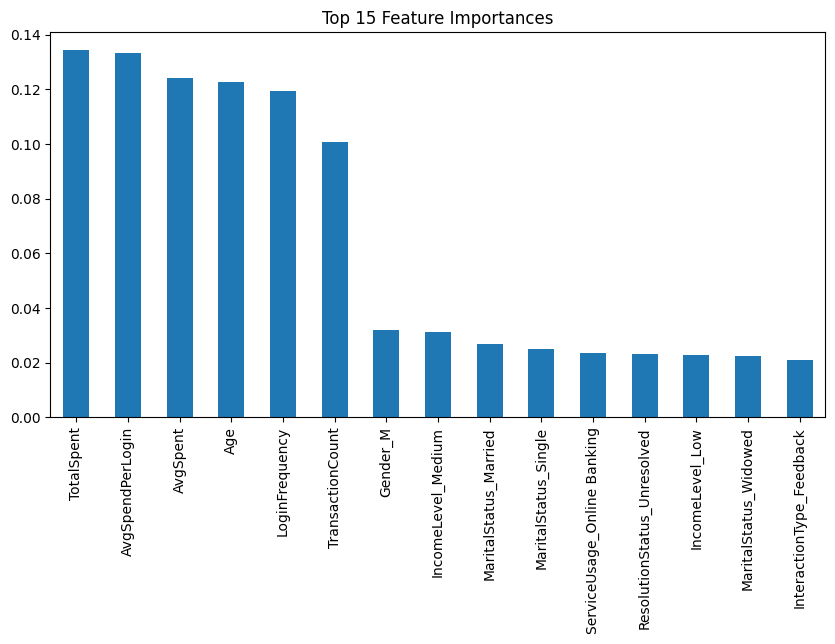

      ChurnProbability  ActualChurn
1319          0.965333            1
777           0.920000            1
655           0.910000            1
538           0.886000            1
455           0.878000            1
102           0.864000            1
687           0.818000            1
91            0.818000            1
21            0.748000            1
762           0.684000            1


In [ ]:
# ===========================
# Customer Churn Prediction with SMOTE
# ===========================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE

# ---------------------------
#  Load Data
# ---------------------------
file_path = '/content/Cleaned_Customer_Churn_Data.csv'
df = pd.read_csv(file_path)

# Encode target variable
le = LabelEncoder()
df['ChurnStatus'] = le.fit_transform(df['ChurnStatus'])  # Yes=1, No=0

# ---------------------------
# Preprocessing
# ---------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['ChurnStatus', 'CustomerID', 'InteractionDate', 'LastLoginDate']]

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop columns not used for modeling
df = df.drop(['CustomerID', 'InteractionDate', 'LastLoginDate', 'InteractionID'], axis=1, errors='ignore')

# Separate features and target
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

# Scale numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# ---------------------------
#  Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
#  Apply SMOTE to training data
# ---------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# ---------------------------
# Model Training & Hyperparameter Tuning
# ---------------------------
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# ---------------------------
#  Model Evaluation
# ---------------------------
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

# ---------------------------
#  Feature Importance
# ---------------------------
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Feature Importances")
plt.show()

# ---------------------------
#  Predicting Churn Probabilities
# ---------------------------
X_test['ChurnProbability'] = y_proba
X_test['ActualChurn'] = y_test.values

# View top 10 customers with highest churn risk
top_risk = X_test.sort_values('ChurnProbability', ascending=False).head(10)
print(top_risk[['ChurnProbability', 'ActualChurn']])

